In [4]:
import sys
sys.path.insert(0,'../src/')
import argparse
import numpy as np
import torch

import sys
from tqdm import tqdm
from dataloader.dataloader import get_dataloader
from dataloader.transform import parse_policies, MultiAugmentation
from optimizer_scheduler import get_optimizer_scheduler
from models import *
from utils import *
from dataloader.augmentations import *
import matplotlib.pyplot as plt

conf = load_yaml('../src/confs/cifar10/wresnet28x10_cifar10.yaml')

train_sampler, train_loader, valid_loader, test_loader = get_dataloader(
    conf, dataroot = '../src/dataloader/datasets', split = 0, split_idx = 0, multinode = False)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [29]:
# controller.eval()
# policies, log_probs, entropies = controller(1) # (M,2*2*5) (M,) (M,) 
# policies = policies.cpu().detach().numpy()
# parsed_policies = parse_policies(policies)        
trfs_list = train_loader.dataset.dataset.transform.transforms 
parsed_policies = [[[('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('ShearY', 1.0), ('TranslateY', 1.0)],
  [('Equalize', 0.8888888888888888), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)]],
 [[('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('ShearY', 1.0), ('TranslateY', 1.0)],
  [('Contrast', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)]],
 [[('ShearY', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('Rotate', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)]],
 [[('AutoContrast', 1.0), ('TranslateY', 1.0)],
  [('Brightness', 0.6666666666666666), ('TranslateY', 1.0)],
  [('Color', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('Equalize', 0.0), ('TranslateY', 1.0)]],
 [[('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('Invert', 1.0), ('TranslateY', 1.0)],
  [('Rotate', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('Rotate', 1.0), ('TranslateY', 1.0)]],
 [[('ShearY', 1.0), ('TranslateY', 1.0)],
  [('Invert', 1.0), ('TranslateY', 1.0)],
  [('ShearY', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('Equalize', 1.0), ('TranslateY', 1.0)]],
 [[('TranslateX', 0.8888888888888888), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)]],
 [[('Rotate', 1.0), ('TranslateY', 1.0)],
  [('Solarize', 0.8888888888888888), ('TranslateY', 1.0)],
  [('TranslateY', 1.0), ('TranslateY', 1.0)],
  [('Posterize', 0.8888888888888888), ('TranslateY', 1.0)],
  [('Cutout', 1.0), ('TranslateY', 1.0)]]]
trfs_list[2] = MultiAugmentation(parsed_policies)## replace augmentation into new one

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


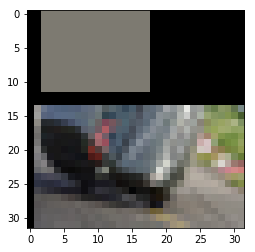

In [40]:
MEAN, STD = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
for i,(data,label) in enumerate(train_loader):
    img = data[0].detach().numpy()
    img = img * np.array(STD)[...,np.newaxis,np.newaxis] + np.array(MEAN)[...,np.newaxis,np.newaxis]
    img = img.swapaxes(0,1).swapaxes(1,2)
    plt.imshow(img)
    break

In [26]:
MEAN, STD = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
for i,(data,label) in enumerate(valid_loader):
    img = data[0].cpu().detach().numpy()
    img = img * np.array(STD)[...,np.newaxis,np.newaxis] + np.array(MEAN)[...,np.newaxis,np.newaxis]
    img = img.swapaxes(0,1).swapaxes(1,2)
    plt.imshow(img)
    break